In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd

labels={
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot',
}
def load_mnist(path, kind='train'):
    import os
    import struct
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        struct.unpack('>II', lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        struct.unpack(">IIII", imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')
y_train,y_test = y_train.astype(np.int64),y_test.astype(np.int64)
print('Training set size: {}'.format(X_train.shape))
print('Testing set size: {}'.format(X_test.shape))

from matplotlib import pyplot as plt,cm

Training set size: (60000, 784)
Testing set size: (10000, 784)


In [4]:
# Normalize dataset (preprocessing for Neural Net)

n_mean = np.mean(X_train)
n_std = np.std(X_train)
print(n_mean,n_std)

X_train = np.array((X_train - n_mean)/n_std)
X_test = np.array((X_test - n_mean)/n_std)

print(X_train.shape)

print(np.mean(X_train))

72.94035223214286 90.02118235130519
(60000, 784)
-1.74808013869143e-17


In [24]:
from model.metrics import accuracy

In [11]:
from model.activation_classes import ReLU,Sigmoid,LeakyReLU
from model.neural_network import CustomNeuralNetwork

In [12]:
from model.optimizers import GradientDescent,Momentum,RMSProp,Adam

# Optimizer 1: gradient descent

In [17]:
act_obj = ReLU()
layers = [X_train.shape[1],100,10]
layers

[784, 100, 10]

Epoch 1. Training loss: 2.9318330049378236, Val loss:2.8177904179101847
Epoch 2. Training loss: 2.6887637758816396, Val loss:2.8940367419215995


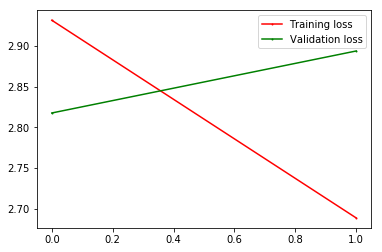

In [18]:
nn = CustomNeuralNetwork(layers,act_obj)
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=2,bs=512)

Epoch 1. Training loss: 1.767314073644877, Val loss:1.9621977696039812
Epoch 2. Training loss: 1.713154670679888, Val loss:1.4291168740368305
Epoch 3. Training loss: 1.620883903906978, Val loss:1.9126062679417812
Epoch 4. Training loss: 1.610880603372522, Val loss:1.4527812798213797
Epoch 5. Training loss: 1.55565546925381, Val loss:1.8240936093288085
Epoch 6. Training loss: 1.4971411720699546, Val loss:1.4341424274760477
Epoch 7. Training loss: 1.5026679973446964, Val loss:1.761068691280788
Epoch 8. Training loss: 1.5002650159665911, Val loss:1.5787729785306737
Epoch 9. Training loss: 1.4218177918516408, Val loss:1.8311250109777368
Epoch 10. Training loss: 1.3775552256132313, Val loss:1.2085991712272899


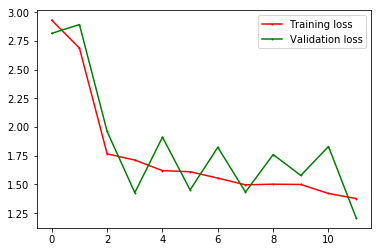

In [19]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.005,epochs=10,bs=512)

Epoch 1. Training loss: 0.7294109890216827, Val loss:0.7571293303654454
Epoch 2. Training loss: 0.7247515532526804, Val loss:0.7526944168197087
Epoch 3. Training loss: 0.7201350017092408, Val loss:0.7482783550191122
Epoch 4. Training loss: 0.7155696414124957, Val loss:0.7438576050205469
Epoch 5. Training loss: 0.711049988328926, Val loss:0.7394775980364626
Epoch 6. Training loss: 0.7065726744573672, Val loss:0.7351348327425783
Epoch 7. Training loss: 0.7021364589743962, Val loss:0.7308175132213711
Epoch 8. Training loss: 0.6977332146464922, Val loss:0.7265004766416918
Epoch 9. Training loss: 0.6933646184493438, Val loss:0.7222185128265478
Epoch 10. Training loss: 0.6890260444381533, Val loss:0.7179350645249138
Epoch 11. Training loss: 0.6847393914854546, Val loss:0.7136704235845478
Epoch 12. Training loss: 0.6805139318191527, Val loss:0.7094559866952688
Epoch 13. Training loss: 0.6763579163374663, Val loss:0.7052955474375573
Epoch 14. Training loss: 0.6722682699385342, Val loss:0.70118

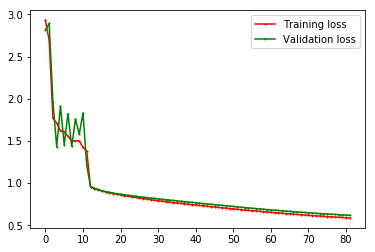

In [22]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.002,epochs=40,bs=512)

Epoch 1. Training loss: 0.5836355078959558, Val loss:0.6150993410053911
Epoch 2. Training loss: 0.5812619501018039, Val loss:0.6128409193151243
Epoch 3. Training loss: 0.5789459293074573, Val loss:0.6106360768362856
Epoch 4. Training loss: 0.5766850365091964, Val loss:0.6084904852793694
Epoch 5. Training loss: 0.5744789296527971, Val loss:0.6063891978772881
Epoch 6. Training loss: 0.5723373977192706, Val loss:0.6043485713369722
Epoch 7. Training loss: 0.570255835669074, Val loss:0.6023475258266295
Epoch 8. Training loss: 0.5682251860925956, Val loss:0.6004011843934712
Epoch 9. Training loss: 0.5662459307847894, Val loss:0.5985146170509894
Epoch 10. Training loss: 0.5643163289219851, Val loss:0.596682528276356
Epoch 11. Training loss: 0.5624337348766189, Val loss:0.5949019343289694
Epoch 12. Training loss: 0.5606009715041292, Val loss:0.5931705748089766
Epoch 13. Training loss: 0.5588193118400651, Val loss:0.5914807632937185
Epoch 14. Training loss: 0.5570907821927147, Val loss:0.589844

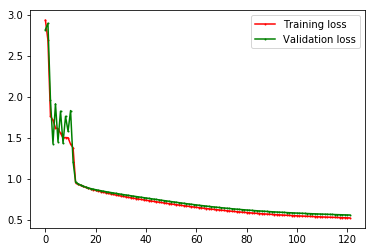

In [23]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.002,epochs=40,bs=512)

Normal Gradient Descent takes about 150 epochs (with manually tuned learning rate) to reach 80% accuracy on test set

In [25]:
#accuracy on test set
y_pred=nn.predict(X_test)
accuracy(y_test,y_pred)

0.8032

# Optimizer 2: Momentum

In [61]:
act_obj = ReLU()
layers = [X_train.shape[1],100,10]
nn = CustomNeuralNetwork(layers,act_obj,opt=Momentum)

Epoch 1. Training loss: 1.9782431452162077, Val loss:1.754339275195669
Epoch 2. Training loss: 1.654076432227679, Val loss:1.5811210360670265


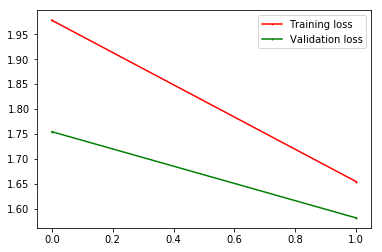

In [62]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=2,bs=512,beta1=0.9)

Epoch 1. Training loss: 1.5014039895713864, Val loss:1.4282706859763334
Epoch 2. Training loss: 1.356052986532401, Val loss:1.30039896845335
Epoch 3. Training loss: 1.245414725116916, Val loss:1.2063326238489638
Epoch 4. Training loss: 1.1591243698569502, Val loss:1.129896227482362
Epoch 5. Training loss: 1.0839643596784354, Val loss:1.0575557732351633
Epoch 6. Training loss: 1.0063708394080297, Val loss:0.9781137288597281
Epoch 7. Training loss: 0.9266249021201841, Val loss:0.9046629082662417
Epoch 8. Training loss: 0.8594279318762205, Val loss:0.8493280604017351
Epoch 9. Training loss: 0.8119586484110163, Val loss:0.8094829150730612
Epoch 10. Training loss: 0.7749317808186631, Val loss:0.7756003862150562
Epoch 11. Training loss: 0.74166099097438, Val loss:0.7435236769302102
Epoch 12. Training loss: 0.7093291147775425, Val loss:0.7118740131342062
Epoch 13. Training loss: 0.6782940451112496, Val loss:0.6823216262085491
Epoch 14. Training loss: 0.6504175261818713, Val loss:0.65690802496

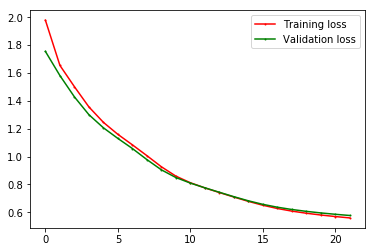

In [63]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=20,bs=512,beta1=0.9)

Epoch 1. Training loss: 0.5506057780259906, Val loss:0.5691002192042336
Epoch 2. Training loss: 0.5425068147147296, Val loss:0.5620410337745381
Epoch 3. Training loss: 0.5350577253330229, Val loss:0.5555534154743696
Epoch 4. Training loss: 0.5281538936023978, Val loss:0.5495226085192954
Epoch 5. Training loss: 0.5217589673422273, Val loss:0.543940726784795
Epoch 6. Training loss: 0.515789630803349, Val loss:0.5386916415584343
Epoch 7. Training loss: 0.5101821903238222, Val loss:0.5337678287554231
Epoch 8. Training loss: 0.50488829727666, Val loss:0.5290617814767321
Epoch 9. Training loss: 0.4998636617167306, Val loss:0.5246166682357379
Epoch 10. Training loss: 0.4950760662835879, Val loss:0.5204086443783965
Epoch 11. Training loss: 0.4905166142281695, Val loss:0.5164064645942483
Epoch 12. Training loss: 0.4861761918316699, Val loss:0.5126758395938752
Epoch 13. Training loss: 0.4820594975451327, Val loss:0.5091832719621227
Epoch 14. Training loss: 0.47814024610846745, Val loss:0.5058423

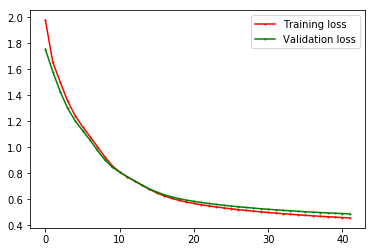

In [64]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=20,bs=512,beta1=0.9)

Epoch 1. Training loss: 0.4166741977541224, Val loss:0.45614356990020194
Epoch 2. Training loss: 0.41565879820264495, Val loss:0.45553364681048425
Epoch 3. Training loss: 0.41442260638028205, Val loss:0.4548421798664089
Epoch 4. Training loss: 0.413212564313963, Val loss:0.4541376228101735
Epoch 5. Training loss: 0.41203106429872943, Val loss:0.4534430697979531
Epoch 6. Training loss: 0.4108719196903877, Val loss:0.45273883548476623
Epoch 7. Training loss: 0.40973100081266095, Val loss:0.4520396109676074
Epoch 8. Training loss: 0.4086102245053826, Val loss:0.45133821819854364
Epoch 9. Training loss: 0.4075029789707413, Val loss:0.45064323623899283
Epoch 10. Training loss: 0.40640367322253296, Val loss:0.4499640633935516
Epoch 11. Training loss: 0.40532180953274344, Val loss:0.44931186488334396
Epoch 12. Training loss: 0.404267287781448, Val loss:0.44868748555237226
Epoch 13. Training loss: 0.40323629930404326, Val loss:0.4480778447635916
Epoch 14. Training loss: 0.40222708500424403, Va

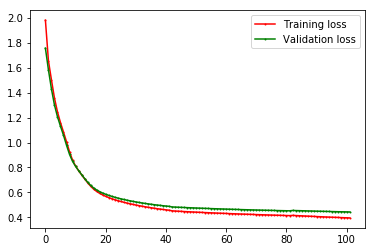

In [66]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=20,bs=512,beta1=0.9)

Reach 83% in only ~100 epochs

In [67]:
#accuracy on test set
y_pred=nn.predict(X_test)
accuracy(y_test,y_pred)

0.8395

# Optimizer 3: Adam

In [96]:
act_obj = ReLU()
layers = [X_train.shape[1],100,10]
nn = CustomNeuralNetwork(layers,act_obj,opt=Adam)

Epoch 1. Training loss: 1.0379637326109254, Val loss:0.48682836357196857
Epoch 2. Training loss: 0.4238603192463661, Val loss:0.4227314636532378
Epoch 3. Training loss: 0.37565871184511457, Val loss:0.4060830455430861
Epoch 4. Training loss: 0.35011122069444095, Val loss:0.39966370521574307


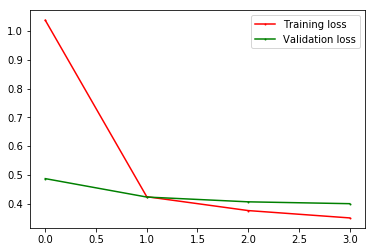

In [97]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=4,bs=512,beta1=0.9,beta2=0.99)

Epoch 1. Training loss: 0.30495336694002445, Val loss:0.3659217473357392
Epoch 2. Training loss: 0.2949423067010172, Val loss:0.36343557277727057
Epoch 3. Training loss: 0.28983872290269114, Val loss:0.3612610514370151
Epoch 4. Training loss: 0.2849694016721142, Val loss:0.3595643567342532
Epoch 5. Training loss: 0.28008828641989314, Val loss:0.35819683898130084
Epoch 6. Training loss: 0.2752342400254782, Val loss:0.3564860701992241
Epoch 7. Training loss: 0.2708044361121958, Val loss:0.3550643674515842
Epoch 8. Training loss: 0.2662767359531267, Val loss:0.35295760746345123
Epoch 9. Training loss: 0.26209300871311625, Val loss:0.3522334579348391
Epoch 10. Training loss: 0.2580863792794052, Val loss:0.3515822934030762
Epoch 11. Training loss: 0.2539833758494128, Val loss:0.35094726301431717
Epoch 12. Training loss: 0.2501648406525396, Val loss:0.3503709422611456


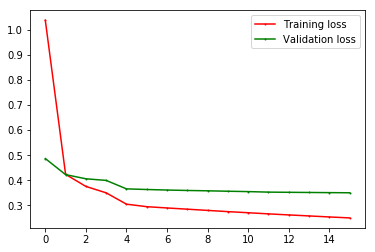

In [98]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=12,bs=512,beta1=0.9,beta2=0.99)

Reach 87% accuracy in only 16 epochs!

In [99]:
#accuracy on test set
y_pred=nn.predict(X_test)
accuracy(y_test,y_pred)

0.8765

Since Adam results in great overfitting, let's include other regularization (l2 and dropout)

# Adam + Dropout

In [103]:
act_obj = ReLU()
layers = [X_train.shape[1],100,10]
nn = CustomNeuralNetwork(layers,act_obj,opt=Adam,keep_prob=0.8)

Epoch 1. Training loss: 1.0317066498215524, Val loss:0.4802829847588148
Epoch 2. Training loss: 0.4599599231073201, Val loss:0.4201392364568962
Epoch 3. Training loss: 0.4065128454115538, Val loss:0.3985676814960054
Epoch 4. Training loss: 0.3775357577247236, Val loss:0.3972471776590397


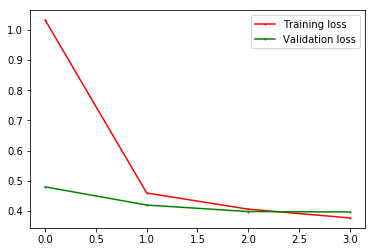

In [104]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=4,bs=512)

Epoch 1. Training loss: 0.32741828418452895, Val loss:0.35779257100722783
Epoch 2. Training loss: 0.3116596966332032, Val loss:0.3545784902559664
Epoch 3. Training loss: 0.3061841429208155, Val loss:0.35085616372123346
Epoch 4. Training loss: 0.3004536535478716, Val loss:0.3477540070598484
Epoch 5. Training loss: 0.296861856285127, Val loss:0.3489320359390706
Epoch 6. Training loss: 0.29007998916082683, Val loss:0.3458671945045298
Epoch 7. Training loss: 0.2874244908314327, Val loss:0.3439858708628181
Epoch 8. Training loss: 0.2823114995595829, Val loss:0.3444324558715505
Epoch 9. Training loss: 0.27808968076598034, Val loss:0.34208387505123405
Epoch 10. Training loss: 0.27477648426464224, Val loss:0.34276998691174715
Epoch 11. Training loss: 0.2685794579434328, Val loss:0.34050197555956063
Epoch 12. Training loss: 0.2667708705642446, Val loss:0.3401206611421726
Epoch 13. Training loss: 0.262950213316813, Val loss:0.34252692820436675
Epoch 14. Training loss: 0.25890861714306956, Val lo

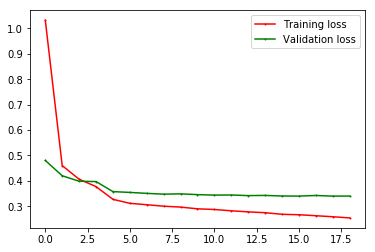

In [105]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=15,bs=512)

88% accuracy in 19  epochs!

In [106]:
#accuracy on test set
y_pred=nn.predict(X_test)
accuracy(y_test,y_pred)

0.8818

train some more...

Epoch 1. Training loss: 0.24480102475639268, Val loss:0.3313077210549393
Epoch 2. Training loss: 0.24516625633300557, Val loss:0.3301432893221368
Epoch 3. Training loss: 0.24468010227850703, Val loss:0.3298356951638451
Epoch 4. Training loss: 0.2437537268449228, Val loss:0.3298453494445676
Epoch 5. Training loss: 0.24316273050109785, Val loss:0.329722483369439
Epoch 6. Training loss: 0.2429608125196632, Val loss:0.32980138288948074
Epoch 7. Training loss: 0.24232683720153375, Val loss:0.32976080993242535
Epoch 8. Training loss: 0.24191137827398734, Val loss:0.32971262984883526
Epoch 9. Training loss: 0.24026288037111415, Val loss:0.3300429316087054
Epoch 10. Training loss: 0.2411287121163183, Val loss:0.3298617284136391
Epoch 11. Training loss: 0.24094856262209272, Val loss:0.3291287933509493
Epoch 12. Training loss: 0.24091840070194412, Val loss:0.3293980275172278
Epoch 13. Training loss: 0.2410055118407869, Val loss:0.32967343220308915
Epoch 14. Training loss: 0.23763759233455425, Va

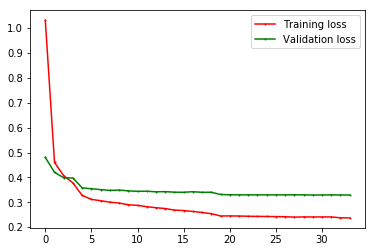

In [107]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.0001,epochs=15,bs=512)

In [108]:
#accuracy on test set
y_pred=nn.predict(X_test)
accuracy(y_test,y_pred)

0.8856

With this, I have matched the same accuracy (and even better log loss) on validation set from Pytorch NN implementation [here](https://github.com/anhquan0412/basic_model_scratch/blob/master/NN_pytorch.ipynb)

# Extra: combine dropout + l2 regularization

In [124]:
act_obj = ReLU()
layers = [X_train.shape[1],100,10]
nn = CustomNeuralNetwork(layers,act_obj,opt=Adam,keep_prob=0.9)

Epoch 1. Training loss: 1.0317066498215524, Val loss:0.4802829847588148
Epoch 2. Training loss: 0.4599599231073201, Val loss:0.4201392364568962
Epoch 3. Training loss: 0.4065128454115538, Val loss:0.3985676814960054
Epoch 4. Training loss: 0.3775357577247236, Val loss:0.3972471776590397


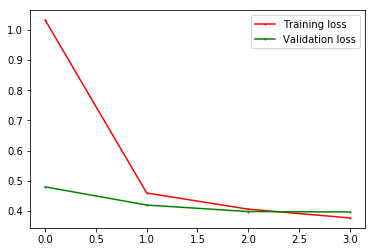

In [125]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=4,bs=512)

Epoch 1. Training loss: 0.3303902121454473, Val loss:0.3587046704807534
Epoch 2. Training loss: 0.32510568397027445, Val loss:0.3585218106372046
Epoch 3. Training loss: 0.3303213408327314, Val loss:0.3619360337709689
Epoch 4. Training loss: 0.3315216302702767, Val loss:0.36253699023487734
Epoch 5. Training loss: 0.3312165462050732, Val loss:0.3617571713215457
Epoch 6. Training loss: 0.32735152571288756, Val loss:0.35801800676325085
Epoch 7. Training loss: 0.3245480411498956, Val loss:0.35593411635916233
Epoch 8. Training loss: 0.31960332516608797, Val loss:0.3548542739374896
Epoch 9. Training loss: 0.31618157888076176, Val loss:0.355768617186535
Epoch 10. Training loss: 0.3138719191455231, Val loss:0.34876174357725204
Epoch 11. Training loss: 0.30795346218581066, Val loss:0.34871107310790367
Epoch 12. Training loss: 0.3055837878880921, Val loss:0.3488325006732789


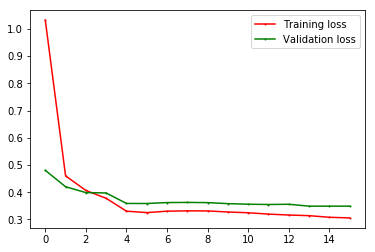

In [126]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=12,bs=512,l2=1)

Epoch 1. Training loss: 0.29180977605399294, Val loss:0.3333131512457867
Epoch 2. Training loss: 0.28590664025453655, Val loss:0.33280775472681706
Epoch 3. Training loss: 0.284354744492831, Val loss:0.3319412315286279
Epoch 4. Training loss: 0.2836359602338351, Val loss:0.3318411543204399
Epoch 5. Training loss: 0.2840274762633642, Val loss:0.3315891587513862
Epoch 6. Training loss: 0.28405648106200443, Val loss:0.3314421561281658
Epoch 7. Training loss: 0.2834176966591488, Val loss:0.3310195950602498
Epoch 8. Training loss: 0.2834370919823108, Val loss:0.33119587451175175
Epoch 9. Training loss: 0.2817027694235941, Val loss:0.33058750121545133
Epoch 10. Training loss: 0.2812265904175054, Val loss:0.33029430245223507
Epoch 11. Training loss: 0.28164920994081216, Val loss:0.33000137582860756
Epoch 12. Training loss: 0.2799430241697258, Val loss:0.3300854585871695
Epoch 13. Training loss: 0.2801152434978174, Val loss:0.3296515518446343
Epoch 14. Training loss: 0.2799086282887769, Val los

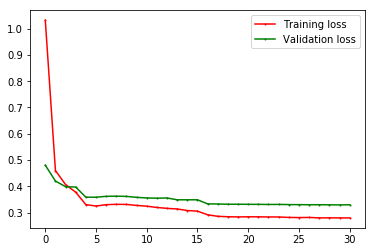

In [127]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.0001,epochs=15,bs=512,l2=1)

Epoch 1. Training loss: 0.27748013482975503, Val loss:0.32833993090317265
Epoch 2. Training loss: 0.2753388743052632, Val loss:0.3281373677260899
Epoch 3. Training loss: 0.2749341795034886, Val loss:0.3280311564041584
Epoch 4. Training loss: 0.27629717595432346, Val loss:0.3279038519347437
Epoch 5. Training loss: 0.2753399341957885, Val loss:0.32789766729990844
Epoch 6. Training loss: 0.27516358246636874, Val loss:0.32786319515992557
Epoch 7. Training loss: 0.2748811351650111, Val loss:0.3278714110469349
Epoch 8. Training loss: 0.27488141172463326, Val loss:0.3278100096095242
Epoch 9. Training loss: 0.27583689317370735, Val loss:0.3277322331345458
Epoch 10. Training loss: 0.2745363724704435, Val loss:0.3277199367088059
Epoch 11. Training loss: 0.27525607076267994, Val loss:0.3277069710313823
Epoch 12. Training loss: 0.2759202771278635, Val loss:0.3276369788713515
Epoch 13. Training loss: 0.2743973189452499, Val loss:0.3276622765719676
Epoch 14. Training loss: 0.2745557499805126, Val lo

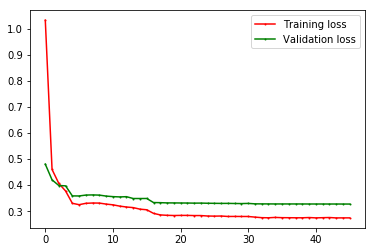

In [129]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.00001,epochs=15,bs=512,l2=1)

In [130]:
#accuracy on test set
y_pred=nn.predict(X_test)
accuracy(y_test,y_pred)

0.8843

L2 reg only seems to prevent training loss from dropping too fast. There is little to no improvement on validation loss